In [1]:
import pandas as pd

#### Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

- id : unique identifier of each diamond
- carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- cut : Quality of Diamond Cut
- color : Color of Diamond
- clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
- depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
- table : A diamond's table is the facet which can be seen when the stone is viewed face up.
- x : Diamond X dimension
- y : Diamond Y dimension
- z : Diamond Z dimension

#### Target variable:

- price: Price of the given Diamond.
- Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

I have solved EDA step by step

In [2]:
data = pd.read_csv(r'E:\\BDA_Project2\\data\\gemstone.csv')

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
data.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
90941,90941,0.35,Ideal,G,VS1,61.4,55.0,4.56,4.58,2.81,696
110554,110554,0.90,Ideal,H,SI1,62.4,53.0,6.12,6.15,3.83,3920
124360,124360,1.03,Premium,H,SI1,61.9,60.0,6.50,6.43,4.00,4406
11965,11965,0.71,Very Good,F,SI2,61.9,56.0,5.72,5.76,3.55,2106
51649,51649,0.70,Premium,E,VS2,62.5,57.0,5.66,5.68,3.54,2818
154597,154597,0.90,Very Good,G,SI1,62.3,57.0,6.17,6.12,3.83,3618
42431,42431,1.01,Ideal,F,VS2,61.0,56.0,6.48,6.52,3.96,7433
39808,39808,1.01,Very Good,E,SI2,63.2,57.0,6.32,6.38,4.01,4295
183599,183599,1.51,Premium,G,VS1,62.6,59.0,7.28,7.36,4.58,14542
166636,166636,0.42,Premium,G,VS1,62.9,58.0,4.76,4.73,2.99,1084


In [5]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
data.drop(labels=['id'],axis=True,inplace=True)

In [8]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
data.shape

(193573, 10)

In [10]:
# Categorical and numerical values

categorical_columns = data.columns[data.dtypes=='object']
numerical_columns = data.columns[data.dtypes!='object']

In [11]:
data[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [12]:
data[categorical_columns]['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [13]:
data[categorical_columns]['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [14]:
data[categorical_columns]['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [15]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


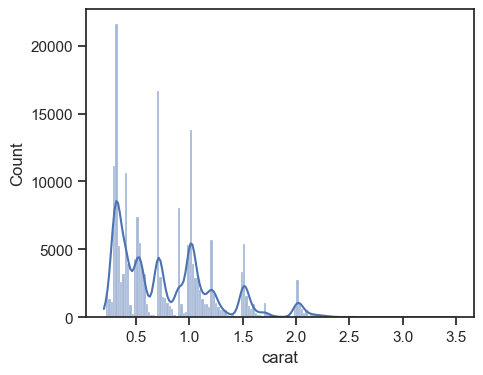

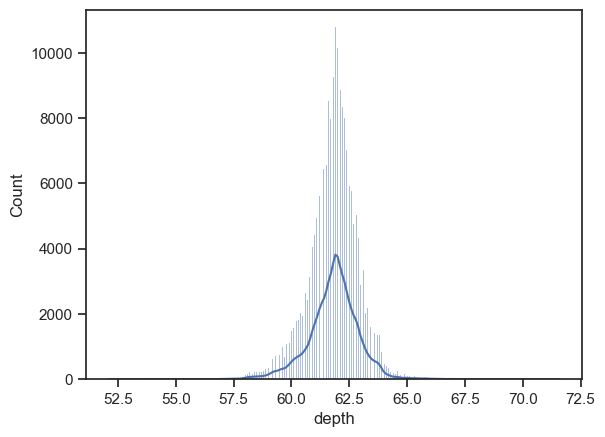

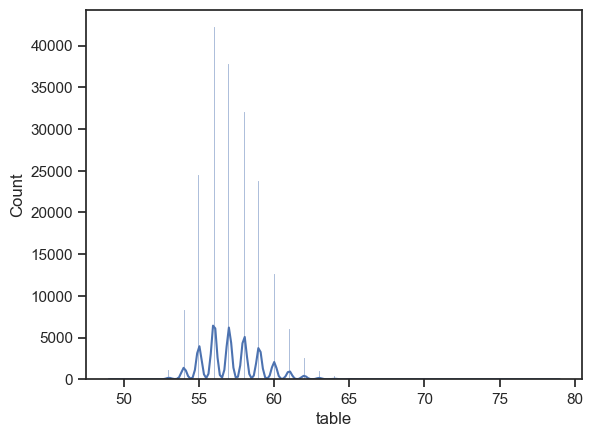

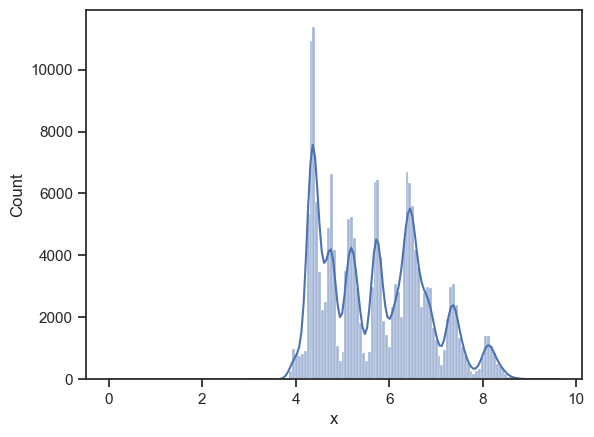

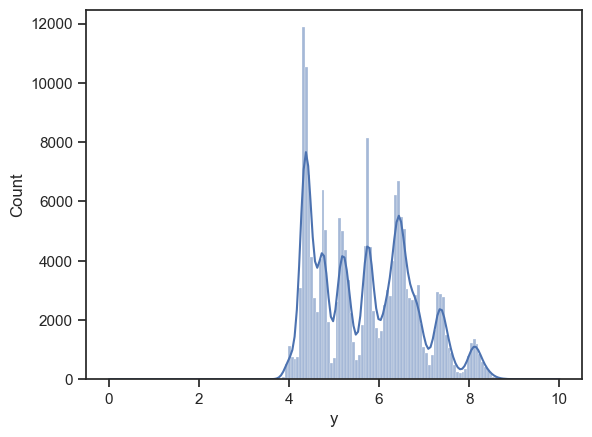

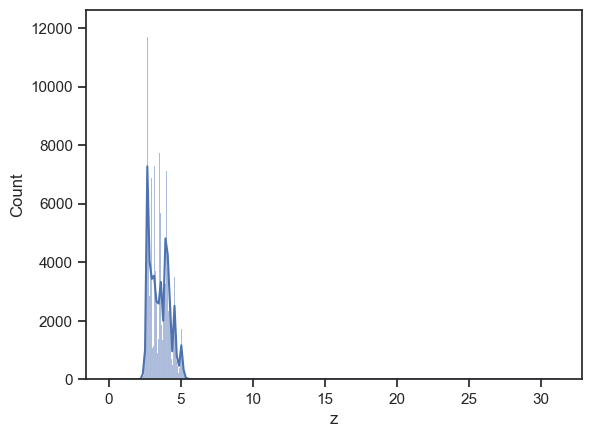

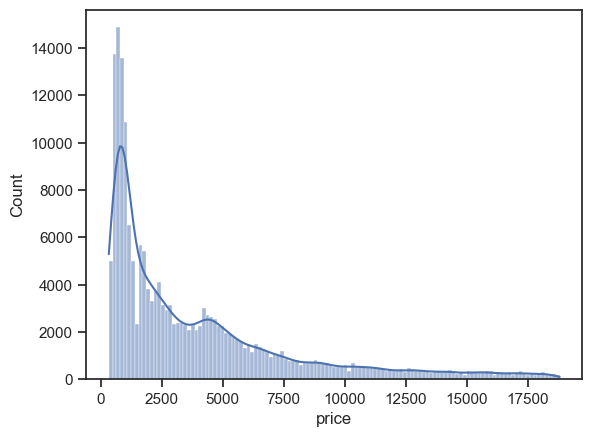

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

plt.figure(figsize=(5,4))

for col in numerical_columns:
    sns.histplot(data=data , x = col , kde=True)
    print("\n")
    plt.show()


<Axes: >

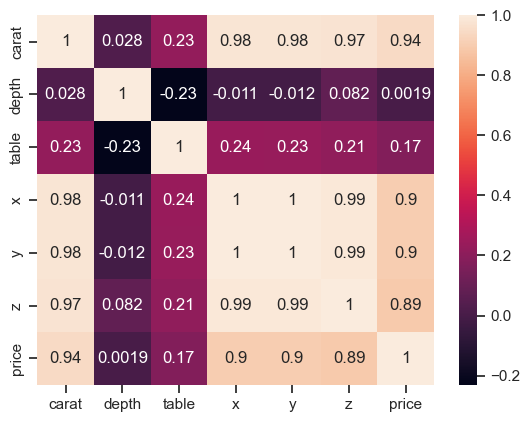

In [17]:
sns.heatmap(data[numerical_columns].corr(),annot=True)